In [14]:
import pandas as pd
import json
from pandas.io.json import json_normalize

df=json.load((open('data/world_bank_projects.json')))
df_norm=json_normalize(df)

In [114]:
#1. Find the 10 countries with most projects
print(df_norm.countryshortname.value_counts().head(10))

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Morocco               12
Nepal                 12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64


In [115]:
#2. Find the top 10 major project themes (using column 'mjtheme_namecode')
theme = json_normalize(df,'mjtheme_namecode')

#Find blank rows and drop them to obtain ID:name list
names = theme[theme.name != ''].drop_duplicates()

#Merge names with theme and produce value count on merged column
theme_names=theme.merge(names, on=['code','code'],suffixes=('_missing','s'))
print(theme_names.names.value_counts().head(10))


Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: names, dtype: int64


In [116]:
# 3. In 2. above you will notice that some entries have only the code and the name is missing. 
# Create a dataframe with the missing names filled in.

#names was created in problem 2. Here I am dropping the column with the missing values.
#
print(theme_names.drop(columns='name_missing'))


     code              names
0       8  Human development
1       8  Human development
2       8  Human development
3       8  Human development
4       8  Human development
5       8  Human development
6       8  Human development
7       8  Human development
8       8  Human development
9       8  Human development
10      8  Human development
11      8  Human development
12      8  Human development
13      8  Human development
14      8  Human development
15      8  Human development
16      8  Human development
17      8  Human development
18      8  Human development
19      8  Human development
20      8  Human development
21      8  Human development
22      8  Human development
23      8  Human development
24      8  Human development
25      8  Human development
26      8  Human development
27      8  Human development
28      8  Human development
29      8  Human development
...   ...                ...
1469    9  Urban development
1470    9  Urban development
1471    9  Urb

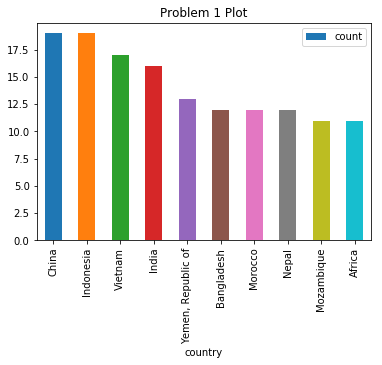

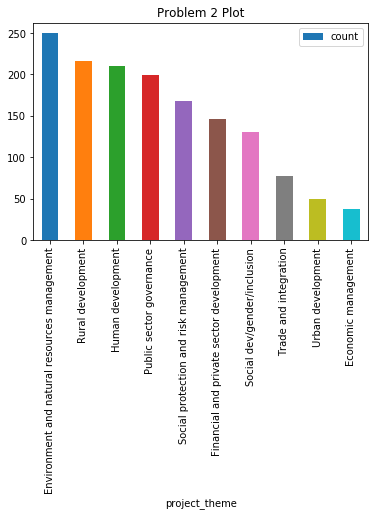

In [181]:
#Extra 
import matplotlib.pyplot as plt
#theme_names.names.value_counts().sort_index().plot(x='names')

#Graph for Problem 1
v1 = df_norm.countryshortname.value_counts().reset_index().rename(columns= {'index':'country', 'countryshortname':'count'}).head(10)
v1.plot(x='country',y='count', kind='bar').set_title('Problem 1 Plot')
plt.show()

#Graph for Problem 2
v2 = theme_names.names.value_counts().reset_index().rename(columns={'index':'project_theme', 'names':'count'}).head(10)
v2.plot(kind='bar',x='project_theme',y='count').set_title('Problem 2 Plot')
plt.show()